# Analyzing Portfolio Returns with Monte-Carlo Simulations

## Objective

With limited amount of capital available, investors are often faced with dilemma of proportion of capital available to be invested in different stocks such that the portfolio returns can be maximized. Using Pandas, YFinance, Matplotlib, and Pandas_DataReader, following analysis will be made in this project.

- Visualization and comparison of two stock's Adjusted Closing Price over the last 6 years.
- Visualization and analysis of two stock's Annual Returns over the last 6 years.
- Using Monte-Carlo Simulation, analysis on how capital should be invested such that the probability of achieving investment goal is maximized.

In this project, assumption have been made that capital available with the investor is \\$100000 and investment goal of the investor is \\$125000. Further, it is assumed that investor would be able to invest capital available in following two stocks.
- Apple Inc (NASDAQ:AAPL)
- Microsoft Corp (NASDAQ:MSFT)

Note: This project is for informational purposes only

## Import Packages

Importing Pandas Package as pd and numpy package as np in order to perform data calculation

In [1]:
import pandas as pd
import numpy as np

Importing Financial packages pandas-datareader and yfinance

In [2]:
import pandas_datareader as web
import yfinance as yf

Importing matplotlib package in order to visualize the stock data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Importing datetime package in order to get current date

In [4]:
from datetime import date

Importing xlwings in order transfer data to and from MS-Excel

In [5]:
import xlwings as xw

Importing random package which would provide random number for Monte-Carlo Simulation

In [6]:
import random

## Inputs

Selecting symbol of stocks in order to import data

In [7]:
symbol_1 = ['AAPL']
symbol_2 = ['MSFT']

Selecting dates for which historical data will be imported

In [8]:
start_date = '2017-01-01'
end_date = date.today()

Assumption has been made that investment available is equal to $100000 and investment goal is \\$125000

In [9]:
investment = 100000
desired_cash = 125000

## 1) Gathering Stock Data and visualizing Adjusted Closing Prices

Gathering Stock Data from Yahooo Finance

In [10]:
stock_data_1 = yf.download(symbol_1, start_date, end_date)
stock_data_2 = yf.download(symbol_2, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Analyzing Apple and Microsoft's Adjusted Closing Price

[*********************100%***********************]  2 of 2 completed
                  AAPL        MSFT
Date                              
2017-01-03   27.133331   57.501350
2017-01-04   27.102953   57.244068
2017-01-05   27.240784   57.244068
2017-01-06   27.544476   57.740242
2017-01-09   27.796768   57.556480
...                ...         ...
2023-04-28  169.679993  307.260010
2023-05-01  169.589996  305.559998
2023-05-02  168.539993  305.410004
2023-05-03  167.449997  304.399994
2023-05-04  165.789993  305.410004

[1595 rows x 2 columns]


<Axes: title={'center': 'Adjusted Closing Price'}, xlabel='Date'>

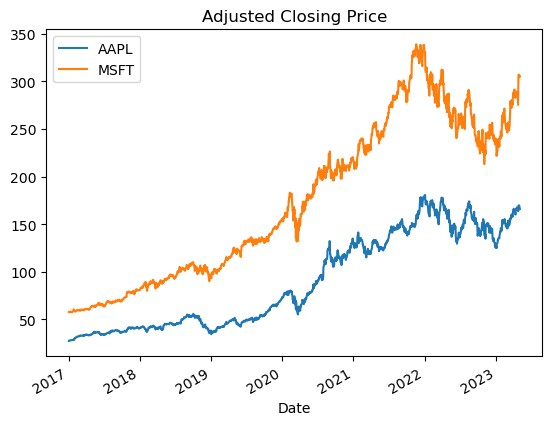

In [53]:
stock_data = yf.download(symbol_2 + symbol_1, start_date, end_date)
print(stock_data["Adj Close"])
stock_data["Adj Close"].plot(title = "Adjusted Closing Price")

Analying the Graph, we can say that
- Both the Apple and Microsoft's Stock Price has risen over the past 6 years.
- The price of Microsoft's share have always been greater than that of Apple's.
- Both the stocks had bearish run during start of 2020, followed by a bullish run which lasted around 2 years.
- Share Price of both the companies are positively co-related.

## 2) Analyzing Annual Stock Returns 

Selecting first and last trading dates of each year upon which annual return will be calculated

In [12]:
First_trading_day_2017 = "2017-01-03"
Last_trading_day_2017 = "2017-12-29"

First_trading_day_2018 = "2018-01-02"
Last_trading_day_2018 = "2018-12-31"

First_trading_day_2019 = "2019-01-02"
Last_trading_day_2019 = "2019-12-31"

First_trading_day_2020 = "2020-01-02"
Last_trading_day_2020 = "2020-12-31"

First_trading_day_2021 = "2021-01-04"
Last_trading_day_2021 = "2021-12-31"

First_trading_day_2022 = "2022-01-03"
Last_trading_day_2022 = "2022-12-30"

Extracting adjusted closing data of stock 1 of each date specified above from stock_data_1 

In [13]:
Adj_close_first_trading_day_2017_stock_1 = stock_data_1.loc[First_trading_day_2017, "Adj Close"]
Adj_close_Last_trading_day_2017_stock_1 = stock_data_1.loc[Last_trading_day_2017, "Adj Close"]

Adj_close_first_trading_day_2018_stock_1 = stock_data_1.loc[First_trading_day_2018, "Adj Close"]
Adj_close_Last_trading_day_2018_stock_1 = stock_data_1.loc[Last_trading_day_2018, "Adj Close"]

Adj_close_first_trading_day_2019_stock_1 = stock_data_1.loc[First_trading_day_2019, "Adj Close"]
Adj_close_Last_trading_day_2019_stock_1 = stock_data_1.loc[Last_trading_day_2019, "Adj Close"]

Adj_close_first_trading_day_2020_stock_1 = stock_data_1.loc[First_trading_day_2020, "Adj Close"]
Adj_close_Last_trading_day_2020_stock_1 = stock_data_1.loc[Last_trading_day_2020, "Adj Close"]

Adj_close_first_trading_day_2021_stock_1 = stock_data_1.loc[First_trading_day_2021, "Adj Close"]
Adj_close_Last_trading_day_2021_stock_1 = stock_data_1.loc[Last_trading_day_2021, "Adj Close"]

Adj_close_first_trading_day_2022_stock_1 = stock_data_1.loc[First_trading_day_2022, "Adj Close"]
Adj_close_Last_trading_day_2022_stock_1 = stock_data_1.loc[Last_trading_day_2022, "Adj Close"]

Extracting adjusted closing data of stock 2 of each date specified above from stock_data_2

In [14]:
Adj_close_first_trading_day_2017_stock_2 = stock_data_2.loc[First_trading_day_2017, "Adj Close"]
Adj_close_Last_trading_day_2017_stock_2 = stock_data_2.loc[Last_trading_day_2017, "Adj Close"]
print(Adj_close_Last_trading_day_2017_stock_2)
Adj_close_first_trading_day_2018_stock_2 = stock_data_2.loc[First_trading_day_2018, "Adj Close"]
Adj_close_Last_trading_day_2018_stock_2 = stock_data_2.loc[Last_trading_day_2018, "Adj Close"]

Adj_close_first_trading_day_2019_stock_2 = stock_data_2.loc[First_trading_day_2019, "Adj Close"]
Adj_close_Last_trading_day_2019_stock_2 = stock_data_2.loc[Last_trading_day_2019, "Adj Close"]

Adj_close_first_trading_day_2020_stock_2 = stock_data_2.loc[First_trading_day_2020, "Adj Close"]
Adj_close_Last_trading_day_2020_stock_2 = stock_data_2.loc[Last_trading_day_2020, "Adj Close"]

Adj_close_first_trading_day_2021_stock_2 = stock_data_2.loc[First_trading_day_2021, "Adj Close"]
Adj_close_Last_trading_day_2021_stock_2 = stock_data_2.loc[Last_trading_day_2021, "Adj Close"]

Adj_close_first_trading_day_2022_stock_2 = stock_data_2.loc[First_trading_day_2022, "Adj Close"]
Adj_close_Last_trading_day_2022_stock_2 = stock_data_2.loc[Last_trading_day_2022, "Adj Close"]

80.35301208496094


Calculating Stock 1's annual return. Formula used:
<center>Annual stock return = (Adj Closing Price at the end of year / Adj Closing Price at the start of year) - 1 </center>

In [15]:
Stock_1_2017_annual_return = (Adj_close_Last_trading_day_2017_stock_1 / Adj_close_first_trading_day_2017_stock_1) - 1
Stock_1_2018_annual_return = (Adj_close_Last_trading_day_2018_stock_1 / Adj_close_first_trading_day_2018_stock_1) - 1
Stock_1_2019_annual_return = (Adj_close_Last_trading_day_2019_stock_1 / Adj_close_first_trading_day_2019_stock_1) - 1
Stock_1_2020_annual_return = (Adj_close_Last_trading_day_2020_stock_1 / Adj_close_first_trading_day_2020_stock_1) - 1
Stock_1_2021_annual_return = (Adj_close_Last_trading_day_2021_stock_1 / Adj_close_first_trading_day_2021_stock_1) - 1
Stock_1_2022_annual_return = (Adj_close_Last_trading_day_2022_stock_1 / Adj_close_first_trading_day_2022_stock_1) - 1

Calculating Stock 2's annual return using the same formula

In [16]:
Stock_2_2017_annual_return = (Adj_close_Last_trading_day_2017_stock_2 / Adj_close_first_trading_day_2017_stock_2) - 1
Stock_2_2018_annual_return = (Adj_close_Last_trading_day_2018_stock_2 / Adj_close_first_trading_day_2018_stock_2) - 1
Stock_2_2019_annual_return = (Adj_close_Last_trading_day_2019_stock_2 / Adj_close_first_trading_day_2019_stock_2) - 1
Stock_2_2020_annual_return = (Adj_close_Last_trading_day_2020_stock_2 / Adj_close_first_trading_day_2020_stock_2) - 1
Stock_2_2021_annual_return = (Adj_close_Last_trading_day_2021_stock_2 / Adj_close_first_trading_day_2021_stock_2) - 1
Stock_2_2022_annual_return = (Adj_close_Last_trading_day_2022_stock_2 / Adj_close_first_trading_day_2022_stock_2) - 1

Creating DataFrame and Graph in order to visualize annual stock returns of the both the stocks.

      Stock 1 Annual Returns  Stock 2 Annual Returns
2017                0.480425                0.397411
2018               -0.070543                0.202191
2019                0.887424                0.582593
2020                0.782399                0.399429
2021                0.380610                0.557900
2022               -0.281995               -0.276872


<Axes: title={'center': 'Annual Stock Returns'}>

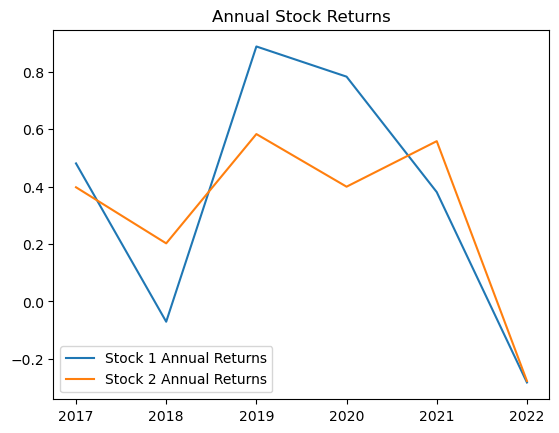

In [52]:
List_of_Stock_1_annual_returns = [Stock_1_2017_annual_return, Stock_1_2018_annual_return, Stock_1_2019_annual_return,\
                                  Stock_1_2020_annual_return, Stock_1_2021_annual_return, Stock_1_2022_annual_return]

List_of_Stock_2_annual_returns = [Stock_2_2017_annual_return, Stock_2_2018_annual_return, Stock_2_2019_annual_return,\
                                  Stock_2_2020_annual_return, Stock_2_2021_annual_return, Stock_2_2022_annual_return]

DataFrame_of_annual_stock_returns = pd.DataFrame()

DataFrame_of_annual_stock_returns["Stock 1 Annual Returns"] = List_of_Stock_1_annual_returns
DataFrame_of_annual_stock_returns["Stock 2 Annual Returns"] = List_of_Stock_2_annual_returns

DataFrame_of_annual_stock_returns.index += 2017

print(DataFrame_of_annual_stock_returns)

DataFrame_of_annual_stock_returns.plot(title = "Annual Stock Returns")


Analyzing the above graph, we can say that:
- Annual stock returns of both the companies were positively co-related every year expect in 2021, were annual return of Microsoft rises,
      whereas annual return of Apple decreases drastically
- Annual returns of Apple's shares are more volatile than annual returns of Microsoft's Shares.

## 3) Monte-Carlo Simulation

In this section, Monte-Carlo Simulation will be performed on both the stocks in order to conclude the proportion of capital an investor should devote to each stock, such that the investment goal can be achieved.

### 3.1) Calculating mean and Standard Deviation of annual stock returns

Calculating Mean and Standard Deviation of Stock 1 annual returns

In [18]:
Mean_annual_returns_stock_1 = DataFrame_of_annual_stock_returns["Stock 1 Annual Returns"].mean()
Standard_deviation_annual_returns_stock_1 = DataFrame_of_annual_stock_returns["Stock 2 Annual Returns"].std()

Calculating Mean and Standard Deviation of Stock 2 annual returns

In [19]:
Mean_annual_returns_stock_2 = DataFrame_of_annual_stock_returns["Stock 2 Annual Returns"].mean()
Standard_deviation_annual_returns_stock_2 = DataFrame_of_annual_stock_returns["Stock 2 Annual Returns"].std()

### 3.2) Preparing a list of random expected portfolio returns

The function return_of_a_stock takes investment amount, number of iterations, proportion of investment to be invested in stock 1, mean and standard devation of both the stocks, and returns a list of portfolio returns in each iteration.

In [54]:
n_iter = 100000 #number of iterations

def return_of_a_stock(Annualized_return_stock_1, Standard_deviation_stock_1,Annualized_return_stock_2\
                      , Standard_deviation_stock_2, investment, n_iter, weight_1):
    List_of_answer = []
    for i in range(n_iter):
        random_number_1 = random.normalvariate(Annualized_return_stock_1, Standard_deviation_stock_1)
        random_number_2 = random.normalvariate(Annualized_return_stock_2, Standard_deviation_stock_2)
        total_return = investment * (((1+random_number_1) * (weight_1)) + ((1+ random_number_2) * (1 - weight_1)))
        List_of_answer.append(total_return)
    return List_of_answer

### 3.3) Creating functions in order to format, analyze, and visualize expected portfolio returns

Function creating_dataFrame created in order to change data format from list to DataFrame

In [21]:
def creating_DataFrame(values):
    df = pd.DataFrame()
    df["Total Portfolio values"] = values
    return df

Function display_header and visualizing_results created in order to visualize data in a graph

In [22]:
from IPython.display import HTML, display
display(HTML('<h2> </h2>'))

def display_header(header):
    return display(HTML(f'<h2>{header}</h2>'))

def visualzing_results(values):
    values.plot.hist(bins = 1000)
    plt.show()

Function probbability_table created in order to analyze the Portfolio returns at various probabilities

In [ ]:
def probability_table(df):
    percentiles = [i/20 for i in range(1, 20)]
    return df["Total Portfolio values"].quantile(percentiles)

Function probability_of_objective created in order to analyze at what probability would investor be able to achieve investment goal

In [33]:
def probability_of_objective(df, desired_cash=125000):
    return ( df['Total Portfolio values'] >= desired_cash ).astype(int).mean()

Function Display_Summary and display_model_summary created in order to visualize the results.

In [55]:
def Display_Summary(result, desired_cash = 125000):
    df = creating_DataFrame(result)
    visualzing_results(df)
    prob_table = probability_table(df)
    prob_objective = probability_of_objective(df, desired_cash=desired_cash)
    return prob_table, prob_objective

def display_model_summary(results, desired_cash = 125000):
    prob_table, prob_objective = Display_Summary(result)
    print('Probability Table')
    print(prob_table.apply(lambda x: f'${x:.2f}'))
    print('')
    print(f'Probability of getting ${desired_cash:,.0f} in cash: {prob_objective:.1%}')
    print('')

### 3.4) Analyzing portfolio returns with several different weights for each stock

Weights here represents the percentage of portfolio invested in stock 1.

In [25]:
weights = [i/10 for i in range(1, 10)]

The loop mentioned below analyze portfolio returns with several diferent weights for each stock. Because the assumption has been made that investment will be made in two stocks only, the percentage of portfolio invested in the stock 2 is equal to 1 minus the percentage of portfolio invested in stock 1.

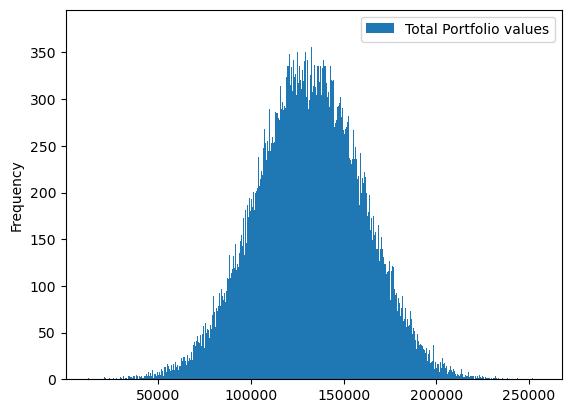

Probability Table
0.05     $83923.11
0.10     $94549.98
0.15    $101493.95
0.20    $107171.52
0.25    $111996.65
0.30    $116340.90
0.35    $120379.68
0.40    $124102.55
0.45    $127799.21
0.50    $131414.22
0.55    $135066.36
0.60    $138819.12
0.65    $142584.47
0.70    $146613.09
0.75    $150961.26
0.80    $155767.04
0.85    $161440.19
0.90    $168555.66
0.95    $178965.07
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 58.8%



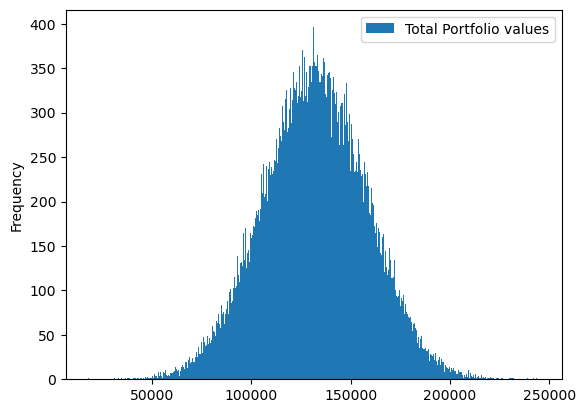

Probability Table
0.05     $88806.87
0.10     $98112.17
0.15    $104724.47
0.20    $109797.01
0.25    $114355.79
0.30    $118277.16
0.35    $121977.32
0.40    $125402.26
0.45    $128719.33
0.50    $131976.81
0.55    $135275.42
0.60    $138640.75
0.65    $142108.61
0.70    $145819.68
0.75    $149696.40
0.80    $154194.59
0.85    $159329.83
0.90    $165800.68
0.95    $175327.77
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 60.6%



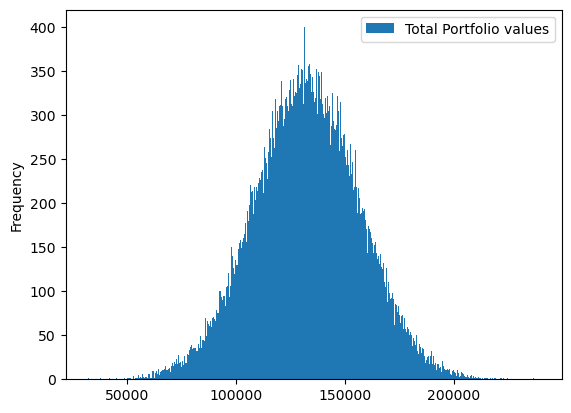

Probability Table
0.05     $92599.97
0.10    $101557.02
0.15    $107414.00
0.20    $112177.31
0.25    $116233.91
0.30    $119879.41
0.35    $123255.84
0.40    $126486.05
0.45    $129576.73
0.50    $132586.80
0.55    $135657.17
0.60    $138820.87
0.65    $142029.37
0.70    $145450.61
0.75    $149115.30
0.80    $153145.87
0.85    $157898.73
0.90    $163948.44
0.95    $172711.29
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 62.3%



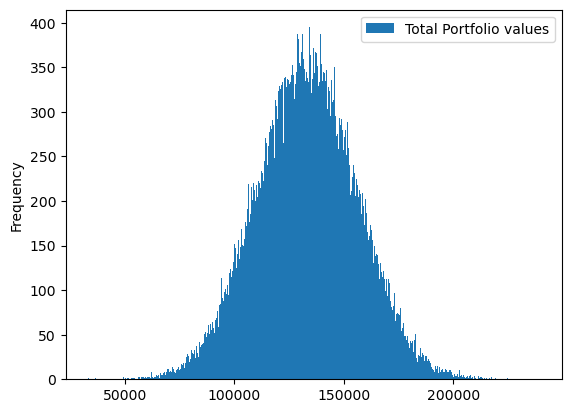

Probability Table
0.05     $95233.91
0.10    $103650.66
0.15    $109335.29
0.20    $113882.54
0.25    $117715.87
0.30    $121127.20
0.35    $124308.07
0.40    $127311.68
0.45    $130232.05
0.50    $133143.00
0.55    $136011.77
0.60    $138953.17
0.65    $141968.44
0.70    $145141.53
0.75    $148628.29
0.80    $152517.70
0.85    $157105.86
0.90    $162821.34
0.95    $171115.30
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 63.9%



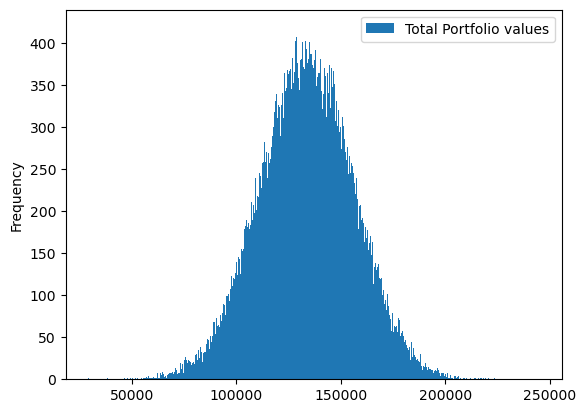

Probability Table
0.05     $96735.16
0.10    $104763.03
0.15    $110200.78
0.20    $114609.65
0.25    $118457.33
0.30    $121777.52
0.35    $124953.48
0.40    $127944.35
0.45    $130863.80
0.50    $133683.37
0.55    $136565.41
0.60    $139424.17
0.65    $142437.35
0.70    $145584.37
0.75    $148929.48
0.80    $152737.04
0.85    $157138.83
0.90    $162704.27
0.95    $170976.40
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 64.9%



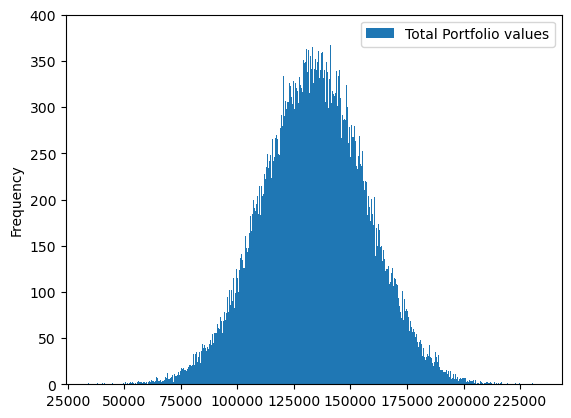

Probability Table
0.05     $96299.40
0.10    $104740.72
0.15    $110229.68
0.20    $114701.44
0.25    $118547.54
0.30    $121982.49
0.35    $125276.23
0.40    $128323.83
0.45    $131214.11
0.50    $134089.29
0.55    $137014.53
0.60    $139941.89
0.65    $143014.91
0.70    $146271.73
0.75    $149744.64
0.80    $153598.63
0.85    $157980.60
0.90    $163699.56
0.95    $171878.62
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 65.4%



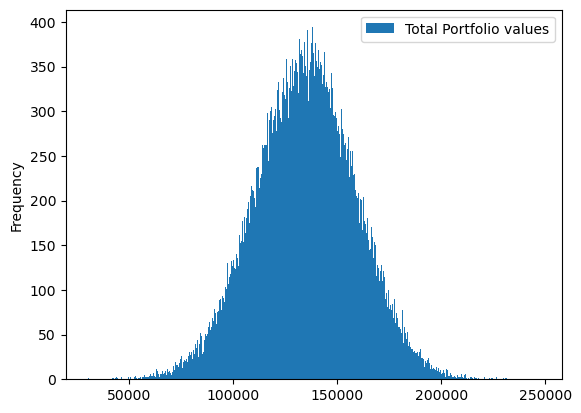

Probability Table
0.05     $94862.32
0.10    $103701.37
0.15    $109648.26
0.20    $114383.99
0.25    $118386.64
0.30    $122051.56
0.35    $125460.07
0.40    $128664.20
0.45    $131736.07
0.50    $134774.65
0.55    $137800.06
0.60    $140840.71
0.65    $143962.56
0.70    $147327.33
0.75    $151008.18
0.80    $155084.14
0.85    $159725.00
0.90    $165739.31
0.95    $174485.25
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 65.7%



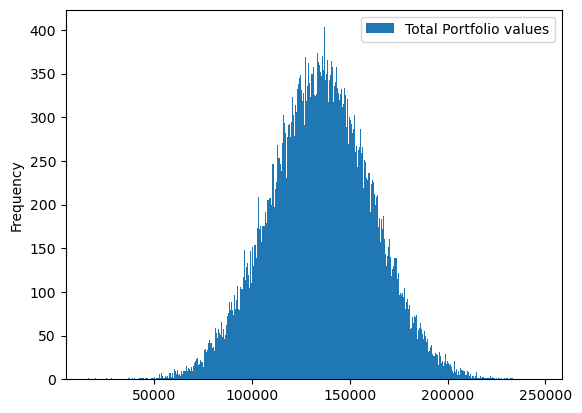

Probability Table
0.05     $92068.22
0.10    $101689.00
0.15    $108129.18
0.20    $113355.69
0.25    $117663.43
0.30    $121548.39
0.35    $125151.07
0.40    $128634.21
0.45    $132023.38
0.50    $135348.30
0.55    $138607.75
0.60    $141949.30
0.65    $145370.11
0.70    $148978.90
0.75    $152922.09
0.80    $157381.09
0.85    $162466.41
0.90    $168835.30
0.95    $178605.90
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 65.2%



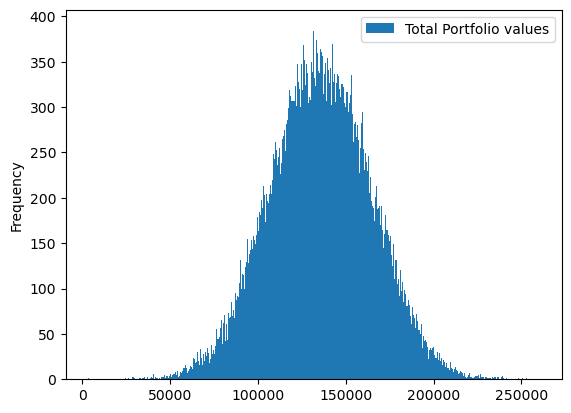

Probability Table
0.05     $88396.75
0.10     $98599.64
0.15    $105704.66
0.20    $111356.16
0.25    $116153.01
0.30    $120507.96
0.35    $124525.56
0.40    $128288.62
0.45    $132073.78
0.50    $135711.56
0.55    $139385.35
0.60    $143116.16
0.65    $146976.24
0.70    $151007.59
0.75    $155333.64
0.80    $160185.26
0.85    $165823.62
0.90    $172937.35
0.95    $183451.42
Name: Total Portfolio values, dtype: object

Probability of getting $125,000 in cash: 64.4%



In [39]:
for i in weights:
    result = return_of_a_stock(Mean_annual_returns_stock_1, Standard_deviation_annual_returns_stock_1, Mean_annual_returns_stock_2\
                      , Standard_deviation_annual_returns_stock_2, investment, n_iter, i)
    display_header(f'Results with {i:.0%} in the Stock 1')
    display_model_summary(result)

## Results

As we can see from the graphs above, using Monte-Carlo Simulations, we can say that probability of investor's portfolio riising to \\$125000 are maximized at 65.7% when investor invests 70% of portfolio (i.e. \\$70,000) in shares of Apple Inc (NASDAQ:AAPL) and 30% of portfolio (i.e \\$30,000) in shares of Microsoft Corp (NASDAQ:MSFT).